In [1]:
# 필요한 라이브러리 설치 및 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 로드
df_benign =  './preprocessed_data/pypi/pypi_ast_analysis_benign.csv' # benign
df_mal = './preprocessed_data/pypi/pypi_ast_analysis_malicious.csv' #malicious

In [3]:
df_benign = pd.read_csv(df_benign)

In [4]:
df_mal = pd.read_csv(df_mal)

In [5]:
df_benign.head()

,file name,entropy,url,function_count,average_cc,class_count,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,...,xmlrpc.client.DateTime.encode,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib
0,./data/pypi/benign/setup_helper.py,0.748544,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/pypi/benign/dev.py,0.722306,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/pypi/benign/gensetup.py,0.848151,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./data/pypi/benign/setup.py,0.858386,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./data/pypi/benign/conftest.py,0.943474,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_benign.shape

(39132, 532)

In [7]:
df_mal.head()

,file name,entropy,url,function_count,average_cc,class_count,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,...,xmlrpc.client.DateTime.encode,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib
0,./data/pypi/malicious/malicious-package-exampl...,0.820153,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/pypi/malicious/pypi_malregistry-main/sc...,0.586384,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/pypi/malicious/pypi_malregistry-main/sc...,0.000000,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./data/pypi/malicious/pypi_malregistry-main/op...,0.586508,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./data/pypi/malicious/pypi_malregistry-main/op...,0.000000,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_mal.shape

(23743, 532)

In [9]:
df_benign['label'] = 0
df_mal['label'] = 1

In [10]:
df = pd.concat([df_benign, df_mal], ignore_index=True)
df.shape

(62875, 533)

In [11]:
df_benign['label'].value_counts()

label
0    39132
Name: count, dtype: int64

In [12]:
df_mal['label'].value_counts()

label
1    23743
Name: count, dtype: int64

In [13]:
df.head()

,file name,entropy,url,function_count,average_cc,class_count,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,...,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib,label
0,./data/pypi/benign/setup_helper.py,0.748544,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/pypi/benign/dev.py,0.722306,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/pypi/benign/gensetup.py,0.848151,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./data/pypi/benign/setup.py,0.858386,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./data/pypi/benign/conftest.py,0.943474,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.count()

file name                62875
entropy                  62875
url                          0
function_count           62875
average_cc               62875
                         ...  
zipfile                  62875
zipfile.ZipFile          62875
zipimport.zipimporter    62875
zlib                     62875
label                    62875
Length: 533, dtype: int64

In [15]:
# -1 레이블 제외
#df = df[df['Label'] != -1]

# 데이터와 레이블 분리
X = df.drop(['label', 'file name', 'url'], axis=1)  # 'Label'과 'Filename' 열을 제외한 모든 데이터
y = df['label']  # 'Label' 열

Text(0.5, 1.0, 'label')

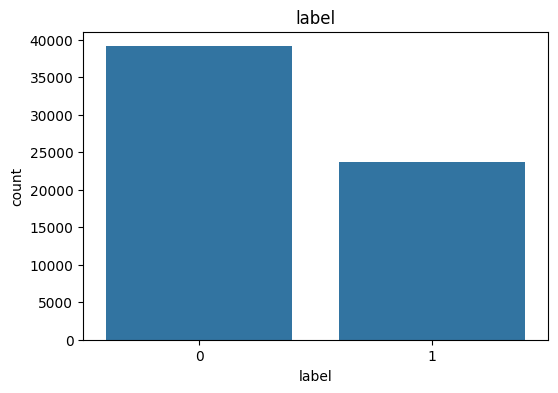

In [16]:
# 타겟 변수 분포_ 1:1임을 알 수 있다.
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('label')

In [17]:
df.isnull().sum() # 결측값 확인

file name                    0
entropy                      0
url                      62875
function_count               0
average_cc                   0
                         ...  
zipfile                      0
zipfile.ZipFile              0
zipimport.zipimporter        0
zlib                         0
label                        0
Length: 533, dtype: int64

In [18]:
# NaN 값을 포함하는 행 제거
df = df.dropna()
df.shape

(0, 533)

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# SMOTE를 사용하여 오버샘플링
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = X, y

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [20]:
# X_resampled.shape # 2407-> 3798개로 증가했음을 알 수 있다.

In [21]:
# xgboost 모델 생성 및 학습
model = XGBClassifier(n_estimators=120, max_depth=40, random_state=42)
model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [0.87157058 0.80508946 0.76254473 0.77821074 0.76588469]
Average CV score: 0.7966600397614314


In [22]:
# 테스트 세트에 대한 모델 성능 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=3)  # 여기서 digits 매개변수를 활용해 셋째 자리까지 나타낼 수 있어

print("xgb 모델 평가")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

xgb 모델 평가
Accuracy: 0.8293
Classification Report:
              precision    recall  f1-score   support

           0      0.835     0.902     0.867      7756
           1      0.819     0.713     0.762      4819

    accuracy                          0.829     12575
   macro avg      0.827     0.807     0.814     12575
weighted avg      0.829     0.829     0.827     12575



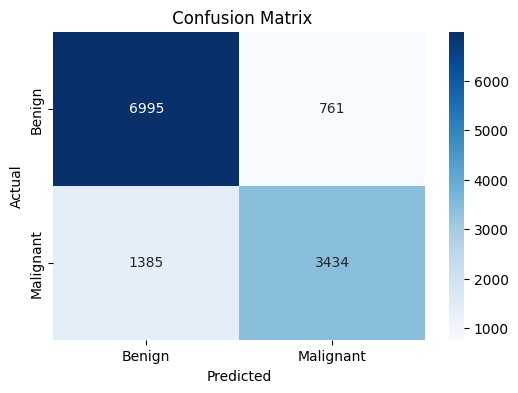

In [23]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(' Confusion Matrix')
plt.show()

In [24]:
# 피처 중요도 계산 및 출력
feature_importances = model.feature_importances_
feature_names = X_resampled.columns
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)


In [25]:

print("Top 50 Feature Importances:")
print(importances_df.head(50))

Top 50 Feature Importances:
                      feature  importance
124                 distutils    0.242443
70           base64.b32decode    0.191566
323                 os.system    0.061217
403                    socket    0.035287
59    asyncio.open_connection    0.028588
478                 threading    0.027169
131                      exec    0.027020
116             ctypes.WinDLL    0.016446
468              tarfile.open    0.013040
529                      zlib    0.011811
331                   pathlib    0.011642
166                   imaplib    0.010355
464                 sysconfig    0.009660
405        socket.getaddrinfo    0.009500
397                      site    0.008820
274               os.getlogin    0.008708
321              os.startfile    0.008422
174                     input    0.007811
71           base64.b64decode    0.007648
134                   filecmp    0.007174
130                      eval    0.006794
95                    compile    0.006440
439   

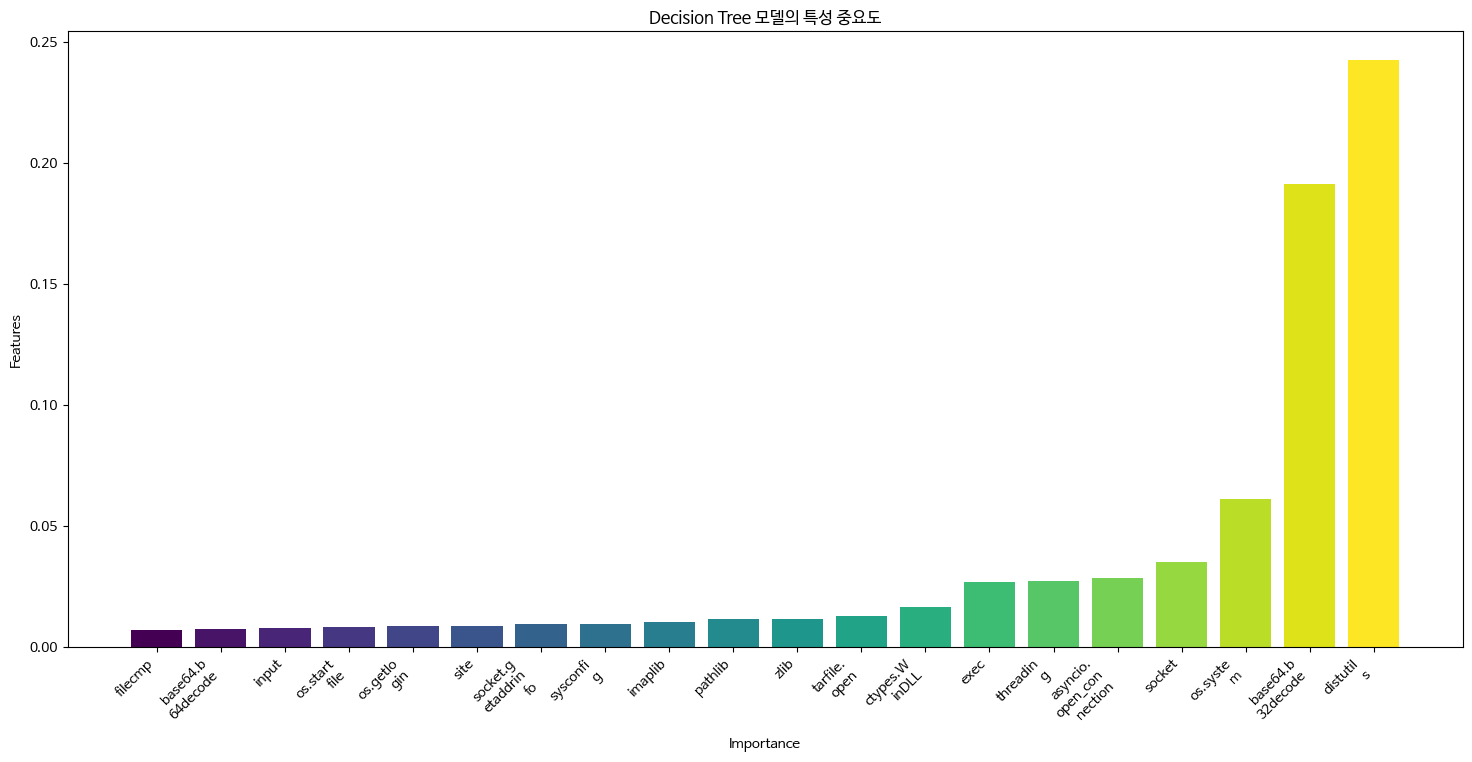

In [26]:
# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 가정: feature_importances와 feature_names이 정의되어 있음
# feature_importances = ...
# feature_names = ...

def split_long_words(s, n):
    """주어진 문자열 s를 길이 n마다 줄바꿈 문자를 삽입하여 반환"""
    return '\n'.join([s[i:i+n] for i in range(0, len(s), n)])

# 상위 20개 특성 선택
indices = np.argsort(feature_importances)[-20:]

# 색상 맵 설정
cmap = plt.cm.viridis  # 또는 plt.cm.tab20 등 다양한 colormap 사용 가능
colors = cmap(np.linspace(0, 1, len(indices)))

# 특성 이름을 지정된 길이마다 줄바꿈 처리
max_length = 8
split_feature_names = [split_long_words(feature_names[i], max_length) for i in indices]

plt.figure(figsize=(18, 8))
plt.title(f"Decision Tree 모델의 특성 중요도")
plt.bar(range(len(indices)), feature_importances[indices], color=colors, align='center')
plt.xticks(range(len(indices)), split_feature_names, rotation=45, ha='right')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## **검증코드**

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd

# 검증을 위해 기존 데이터에서 500개를 분리하여 검증용 데이터로 저장시킴.


# 검증용 데이터 분리
validation_data = pd.read_csv('./preprocessed_data/pypi/pypi_ast_analysis_validation.csv') # 검증 데이터 csv명 추가하기.
# validation_data.head()
# print(validation_data.columns)
# validation_labels = validation_data['Label']
validation_FileName = validation_data['file name']
validation_features = validation_data.drop(columns=['file name'])

In [28]:
validation_features.head()

,entropy,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,FTP.storbinary,FTP.storlines,HTTPConnection.request,HTTPConnection.send,IMAP4.send,...,xmlrpc.client.DateTime.encode,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib
0,0.854227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.690752,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.978496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.750627,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.867007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# 검증 데이터에 대한 악성 확률 예측
y_pred_prob = model.predict_proba(validation_features)[:, 1]
# 결과 출력
for i, prob in enumerate(y_pred_prob):
    print(f"Validation Sample {i}: Malignant Probability = {prob:.4f}")


ValueError: feature_names mismatch: ['entropy', 'function_count', 'average_cc', 'class_count', 'BaseHTTPServer.HTTPServer', 'DocXMLRPCServer.DocXMLRPCServer', 'FTP.retrbinary', 'FTP.retrlines', 'FTP.storbinary', 'FTP.storlines', 'HTTPConnection.request', 'HTTPConnection.send', 'IMAP4.send', 'MySQLCursor.fetchall', 'MySQLCursor.fetchmany', 'MySQLCursor.fetchone', 'NNTP.post', 'POP3.retr', 'Packer.pack_array', 'Packer.pack_bytes', 'Packer.pack_double', 'Packer.pack_farray', 'Packer.pack_float', 'Packer.pack_fopaque', 'Packer.pack_fstring', 'Packer.pack_list', 'Packer.pack_string', 'SMTP.send_message, rcpt_options=)', 'SMTP.sendmail, rcpt_options=)', 'SSLSocket.read', 'SSLSocket.write', 'SimpleXMLRPCServer.SimpleXMLRPCServer', 'SocketServer.BaseServer', 'SocketServer.TCPServer', 'SocketServer.UDPServer', 'SocketServer.UnixDatagramServer', 'SocketServer.UnixStreamServer', 'Telnet.write', 'ZipFile.read', 'ZipFile.write', '__import__', '_dummy_thread', '_thread', '_winreg.ConnectRegistry', 'aifc', 'aifc.open', 'anydbm.open', 'asynchat', 'asynchat.async_chat', 'asyncio', 'asyncio.StreamReader.read', 'asyncio.StreamReader.readexactly', 'asyncio.StreamReader.readline', 'asyncio.StreamReader.readuntil', 'asyncio.StreamWriter.write', 'asyncio.StreamWriter.write_eof', 'asyncio.StreamWriter.writelines', 'asyncio.create_subprocess_exec', 'asyncio.create_subprocess_shell', 'asyncio.open_connection', 'asyncio.open_unix_connection', 'asyncio.start_server', 'asyncio.start_unix_server', 'asyncore', 'asyncore.dispatcher', 'asyncore.dispatcher.recv', 'asyncore.dispatcher.send', 'asyncore.dispatcher_with_send', 'atexit.register', 'base64.b16decode', 'base64.b32decode', 'base64.b64decode', 'base64.decode', 'base64.decodestring', 'base64.standard_b64decode', 'base64.urlsafe_b64decode', 'bsddb.btopen', 'bsddb.hashopen', 'bsddb.rnopen', 'bz2', 'bz2.BZ2File', 'cgi', 'cgitb', 'chunk', 'class csv.DictReader', 'code.InteractiveConsole', 'code.InteractiveInterpreter', 'code.compile_command', 'code.interact', 'codeop.CommandCompiler', 'codeop.Compile', 'codeop.compile_command', 'commands.getoutput', 'commands.getstatus', 'commands.getstatusoutput', 'compile', 'compileall.compile_dir', 'compileall.compile_file', 'compileall.compile_path', 'compile¶', 'concurrent', 'concurrent.futures.Executor', 'concurrent.futures.Future', 'concurrent.futures.ProcessPoolExecutor', 'concurrent.futures.ThreadPoolExecutor', 'configparser', 'cookielib.FileCookieJar', 'cookielib.LWPCookieJar', 'cookielib.MozillaCookieJar', 'copyreg', 'csv', 'csv.reader', 'ctypes', 'ctypes.CDLL', 'ctypes.OleDLL', 'ctypes.PyDLL', 'ctypes.WinDLL', 'curses', 'dbhash.open', 'dbm', 'dbm.open', 'debugging', 'delattr', 'dir', 'distutils', 'dl.open', 'dumbdbm.open', 'dummy_threading', 'email', 'ensurepip', 'eval', 'exec', 'execfile', 'file', 'filecmp', 'filecmp.cmp', 'filecmp.cmpfiles', 'filecmp.dircmp', 'fileinput', 'fileinput.FileInput', 'fileinput.input', 'findertools.copy', 'findertools.move', 'fnmatch', 'ftplib', 'ftplib.FTP', 'ftplib.FTP_TLS', 'gdbm.open', 'getattr', 'getpass', 'glob', 'gzip', 'gzip.GzipFile', 'gzip.open', 'hashlib', 'hmac', 'http', 'http.client.HTTPConnection', 'http.client.HTTPSConnection', 'http.cookiejar.FileCookieJar', 'http.cookiejar.LWPCookieJar', 'http.cookiejar.MozillaCookieJar', 'http.server.HTTPServer', 'http.server.ThreadingHTTPServer', 'httplib.HTTPConnection', 'httplib.HTTPSConnection', 'imaplib', 'imaplib.IMAP4', 'imaplib.IMAP4_SSL', 'imaplib.IMAP4_stream', 'imp.load_compiled', 'imp.load_dynamic', 'imp.load_module', 'importlib.import_module', 'input', 'io.BufferedIOBase.write', 'io.BufferedRWPair', 'io.BufferedRandom', 'io.BufferedWriter', 'io.BytesIO', 'io.FileIO', 'io.IOBase', 'io.IOBase.readline', 'io.IOBase.readlines', 'io.IOBase.writelines', 'io.RawIOBase', 'io.RawIOBase.write', 'io.StringIO', 'io.TextIOBase', 'io.TextIOBase.write', 'io.TextIOWrapper', 'io.open', 'ipaddress', 'ipaddress.IPv4Network', 'ipaddress.IPv6Network', 'json', 'linecache', 'linecache.getline', 'lzma', 'lzma.LZMAFile', 'lzma.open', 'macostools.copy', 'macostools.copytree', 'macostools.mkalias', 'macpath', 'mailbox', 'mailbox.Babyl', 'mailbox.MH', 'mailbox.MMDF', 'mailbox.Mailbox', 'mailbox.Maildir', 'mailbox.mbox', 'mailcap', 'marshal', 'marshal.dump', 'marshal.load', 'memoryview', 'mimetypes', 'mimetypes.MimeTypes.read', 'mimetypes.MimeTypes.read_mime_types', 'mimetypes.MimeTypes.read_windows_registry', 'mimetypes.MimeTypes.readfp', 'mmap', 'modulefinder.AddPackagePath', 'modulefinder.ReplacePackage', 'msilib', 'msvcrt', 'multiprocessing', 'multiprocessing.Manager', 'multiprocessing.Pool', 'multiprocessing.Process', 'multiprocessing.Process.run', 'multiprocessing.connection.Connection', 'multiprocessing.connection.Connection.recv', 'multiprocessing.connection.Connection.recv_bytes', 'multiprocessing.connection.Connection.recv_bytes_into', 'multiprocessing.connection.Connection.send', 'multiprocessing.connection.Connection.send_bytes', 'multiprocessing.managers.BaseManager', 'multiprocessing.managers.SyncManager', 'multiprocessing.pool.Pool', 'netrc', 'nntplib', 'nntplib.NNTP', 'open', 'os.SCHED', 'os._exit', 'os.abort', 'os.access', 'os.chdir', 'os.conf', 'os.ctermid', 'os.environ', 'os.environb', 'os.execl', 'os.execle', 'os.execlp', 'os.execlpe', 'os.execv', 'os.execve', 'os.execvp', 'os.execvpe', 'os.fchdir', 'os.fchown', 'os.fdopen', 'os.fork', 'os.forkpty', 'os.fspath', 'os.get_exec_path', 'os.getcwd', 'os.getegid', 'os.geteuid', 'os.getgid', 'os.getgrouplist', 'os.getlogin', 'os.getpgid', 'os.getpgrp', 'os.getpid', 'os.getppid', 'os.getresgid', 'os.getresuid', 'os.getuid', 'os.kill', 'os.killpg', 'os.link', 'os.mkdir', 'os.name', 'os.open', 'os.openpty', 'os.path', 'os.pipe', 'os.popen', 'os.popen2', 'os.popen3', 'os.popen4', 'os.pread', 'os.preadv', 'os.pwrite', 'os.pwritev', 'os.read', 'os.register_at_fork', 'os.remove', 'os.removedirs', 'os.rename', 'os.renames', 'os.replace', 'os.rmdir', 'os.sched', 'os.sendfile', 'os.setegid', 'os.seteuid', 'os.setgid', 'os.setuid', 'os.spawnl', 'os.spawnle', 'os.spawnlp', 'os.spawnlpe', 'os.spawnv', 'os.spawnve', 'os.spawnvp', 'os.spawnvpe', 'os.startfile', 'os.sysconf', 'os.system', 'os.unlink', 'os.wait', 'os.write', 'os.writev', 'ossaudiodev.open', 'parser.expr', 'parser.suite', 'pathlib', 'pathlib.Path.rename', 'pathlib.Path.replace', 'pathlib.Path.rmdir', 'pathlib.Path.unlink', 'pickle', 'pickle.dump', 'pickle.load', 'pickle.loads', 'pipes.Template', 'pkgutil.ImpImporter', 'pkgutil.ImpLoader', 'pkgutil.find_loader', 'pkgutil.get_importer', 'pkgutil.get_loader', 'platform', 'plistlib', 'plistlib.readPlist', 'plistlib.readPlistFromResource', 'plistlib.writePlist', 'plistlib.writePlistToResource', 'popen2.Popen3', 'popen2.Popen4', 'popen2.popen2', 'popen2.popen3', 'popen2.popen4', 'poplib', 'poplib.POP3', 'poplib.POP3_SSL', 'pty.fork', 'pty.openpty', 'pty.spawn', 'pwd.getpwall', 'pwd.getpwnam', 'pwd.getpwuid', 'py_compile.compile', 'py_compile.main', 'queue', 'quopri', 'raw_input', 'robotparser.RobotFileParser.read', 'runpy', 'runpy.run_module', 'runpy.run_path', 'sched', 'secrets', 'select', 'selectors', 'setattr', 'shelve', 'shelve.DbfilenameShelf', 'shelve.open', 'shutil', 'shutil.copy', 'shutil.copy2', 'shutil.copyfile', 'shutil.copyfileobj', 'shutil.copytree', 'shutil.make_archive', 'shutil.move', 'shutil.rmtree', 'signal', 'signal.alarm', 'signal.pause', 'signal.siginterrupt', 'signal.signal', 'site', 'smtpd', 'smtplib', 'smtplib.LMTP', 'smtplib.SMTP', 'smtplib.SMTP_SSL', 'socket', 'socket.create_connection', 'socket.getaddrinfo', 'socket.gethostbyname', 'socket.gethostname', 'socket.recv', 'socket.recv_into', 'socket.recvfrom', 'socket.recvfrom_into', 'socket.recvmsg', 'socket.recvmsg_into', 'socket.send', 'socket.sendall', 'socket.sendfile', 'socket.sendmsg', 'socket.sendmsg_afalg', 'socket.sendto', 'socket.socket', 'socket.socketpair', 'socketserver', 'socketserver.BaseServer', 'socketserver.ForkingTCPServer', 'socketserver.ForkingUDPServer', 'socketserver.TCPServer', 'socketserver.ThreadingTCPServer', 'socketserver.ThreadingUDPServer', 'socketserver.UDPServer', 'socketserver.UnixDatagramServer', 'socketserver.UnixStreamServer', 'spwd.getspall', 'spwd.getspnam', 'sqlite3', 'sqlite3.Connection.execute', 'sqlite3.Connection.executemany', 'sqlite3.Connection.executescript', 'sqlite3.connect', 'ssl', 'ssl.SSLSocket', 'ssl.SSLSocket.read', 'ssl.SSLSocket.send', 'ssl.SSLSocket.sendall', 'ssl.SSLSocket.sendfile', 'ssl.SSLSocket.write', 'stat', 'subprocess', 'subprocess security', 'subprocess.Popen', 'subprocess.call', 'subprocess.check_call', 'subprocess.check_output', 'subprocess.getoutput', 'subprocess.getstatusoutput', 'subprocess.run', 'sunau', 'sunau.open', 'sunau.openfp', 'sys', 'sys.exit', 'sys.exitfunc', 'sys.setprofile', 'sys.settrace', 'sysconfig', 'tarfile', 'tarfile.TarFile', 'tarfile.TarFileCompat', 'tarfile.open', 'telnetlib', 'telnetlib.Telnet', 'tempfile', 'tempfile.NamedTemporaryFile', 'tempfile.SpooledTemporaryFile', 'tempfile.TemporaryFile', 'tempfile.mkdtemp', 'tempfile.mkstemp', 'test', 'threading', 'threading.Thread', 'threading.Thread.run', 'time', 'time.set', 'time.sleep', 'tkinter', 'traceback', 'urllib', 'urllib.FancyURLopener', 'urllib.URLopener', 'urllib.request.FancyURLopener', 'urllib.request.URLopener', 'urllib.request.build_opener', 'urllib.request.urlopen', 'urllib.urlopen', 'urllib.urlretrieve', 'urllib2.FTPHandler.ftp_open', 'urllib2.FileHandler.file_open', 'urllib2.HTTPHandler.http_open', 'urllib2.HTTPSHandler.https_open', 'urllib2.OpenerDirector.open', 'urllib2.Request', 'urllib2.urlopen', 'uuid', 'venv', 'wave', 'wave.open', 'wave.openfp', 'webbrower.open', 'webbrower.open_new', 'webbrower.open_new_tab', 'webbrowser', 'win32com', 'winreg.ConnectRegistry', 'wsgiref', 'wsgiref.simple_server.WSGIServer', 'wsgiref.simple_server.make_server', 'xdrlib', 'xml', 'xmlrpc', 'xmlrpc.client.Binary.encode', 'xmlrpc.client.DateTime.encode', 'xmlrpc.client.ServerProxy', 'xmlrpc.server.DocXMLRPCServer', 'xmlrpc.server.SimpleXMLRPCServer', 'xmlrpclib.ServerProxy', 'zipapp', 'zipfile', 'zipfile.ZipFile', 'zipimport.zipimporter', 'zlib'] ['entropy', 'BaseHTTPServer.HTTPServer', 'DocXMLRPCServer.DocXMLRPCServer', 'FTP.retrbinary', 'FTP.retrlines', 'FTP.storbinary', 'FTP.storlines', 'HTTPConnection.request', 'HTTPConnection.send', 'IMAP4.send', 'MySQLCursor.fetchall', 'MySQLCursor.fetchmany', 'MySQLCursor.fetchone', 'NNTP.post', 'POP3.retr', 'Packer.pack_array', 'Packer.pack_bytes', 'Packer.pack_double', 'Packer.pack_farray', 'Packer.pack_float', 'Packer.pack_fopaque', 'Packer.pack_fstring', 'Packer.pack_list', 'Packer.pack_string', 'SMTP.send_message, rcpt_options=)', 'SMTP.sendmail, rcpt_options=)', 'SSLSocket.read', 'SSLSocket.write', 'SimpleXMLRPCServer.SimpleXMLRPCServer', 'SocketServer.BaseServer', 'SocketServer.TCPServer', 'SocketServer.UDPServer', 'SocketServer.UnixDatagramServer', 'SocketServer.UnixStreamServer', 'Telnet.write', 'ZipFile.read', 'ZipFile.write', '__import__', '_dummy_thread', '_thread', '_winreg.ConnectRegistry', 'aifc', 'aifc.open', 'anydbm.open', 'asynchat', 'asynchat.async_chat', 'asyncio', 'asyncio.StreamReader.read', 'asyncio.StreamReader.readexactly', 'asyncio.StreamReader.readline', 'asyncio.StreamReader.readuntil', 'asyncio.StreamWriter.write', 'asyncio.StreamWriter.write_eof', 'asyncio.StreamWriter.writelines', 'asyncio.create_subprocess_exec', 'asyncio.create_subprocess_shell', 'asyncio.open_connection', 'asyncio.open_unix_connection', 'asyncio.start_server', 'asyncio.start_unix_server', 'asyncore', 'asyncore.dispatcher', 'asyncore.dispatcher.recv', 'asyncore.dispatcher.send', 'asyncore.dispatcher_with_send', 'atexit.register', 'base64.b16decode', 'base64.b32decode', 'base64.b64decode', 'base64.decode', 'base64.decodestring', 'base64.standard_b64decode', 'base64.urlsafe_b64decode', 'bsddb.btopen', 'bsddb.hashopen', 'bsddb.rnopen', 'bz2', 'bz2.BZ2File', 'cgi', 'cgitb', 'chunk', 'class csv.DictReader', 'code.InteractiveConsole', 'code.InteractiveInterpreter', 'code.compile_command', 'code.interact', 'codeop.CommandCompiler', 'codeop.Compile', 'codeop.compile_command', 'commands.getoutput', 'commands.getstatus', 'commands.getstatusoutput', 'compile', 'compileall.compile_dir', 'compileall.compile_file', 'compileall.compile_path', 'compile¶', 'concurrent', 'concurrent.futures.Executor', 'concurrent.futures.Future', 'concurrent.futures.ProcessPoolExecutor', 'concurrent.futures.ThreadPoolExecutor', 'configparser', 'cookielib.FileCookieJar', 'cookielib.LWPCookieJar', 'cookielib.MozillaCookieJar', 'copyreg', 'csv', 'csv.reader', 'ctypes', 'ctypes.CDLL', 'ctypes.OleDLL', 'ctypes.PyDLL', 'ctypes.WinDLL', 'curses', 'dbhash.open', 'dbm', 'dbm.open', 'debugging', 'delattr', 'dir', 'distutils', 'dl.open', 'dumbdbm.open', 'dummy_threading', 'email', 'ensurepip', 'eval', 'exec', 'execfile', 'file', 'filecmp', 'filecmp.cmp', 'filecmp.cmpfiles', 'filecmp.dircmp', 'fileinput', 'fileinput.FileInput', 'fileinput.input', 'findertools.copy', 'findertools.move', 'fnmatch', 'ftplib', 'ftplib.FTP', 'ftplib.FTP_TLS', 'gdbm.open', 'getattr', 'getpass', 'glob', 'gzip', 'gzip.GzipFile', 'gzip.open', 'hashlib', 'hmac', 'http', 'http.client.HTTPConnection', 'http.client.HTTPSConnection', 'http.cookiejar.FileCookieJar', 'http.cookiejar.LWPCookieJar', 'http.cookiejar.MozillaCookieJar', 'http.server.HTTPServer', 'http.server.ThreadingHTTPServer', 'httplib.HTTPConnection', 'httplib.HTTPSConnection', 'imaplib', 'imaplib.IMAP4', 'imaplib.IMAP4_SSL', 'imaplib.IMAP4_stream', 'imp.load_compiled', 'imp.load_dynamic', 'imp.load_module', 'importlib.import_module', 'input', 'io.BufferedIOBase.write', 'io.BufferedRWPair', 'io.BufferedRandom', 'io.BufferedWriter', 'io.BytesIO', 'io.FileIO', 'io.IOBase', 'io.IOBase.readline', 'io.IOBase.readlines', 'io.IOBase.writelines', 'io.RawIOBase', 'io.RawIOBase.write', 'io.StringIO', 'io.TextIOBase', 'io.TextIOBase.write', 'io.TextIOWrapper', 'io.open', 'ipaddress', 'ipaddress.IPv4Network', 'ipaddress.IPv6Network', 'json', 'linecache', 'linecache.getline', 'lzma', 'lzma.LZMAFile', 'lzma.open', 'macostools.copy', 'macostools.copytree', 'macostools.mkalias', 'macpath', 'mailbox', 'mailbox.Babyl', 'mailbox.MH', 'mailbox.MMDF', 'mailbox.Mailbox', 'mailbox.Maildir', 'mailbox.mbox', 'mailcap', 'marshal', 'marshal.dump', 'marshal.load', 'memoryview', 'mimetypes', 'mimetypes.MimeTypes.read', 'mimetypes.MimeTypes.read_mime_types', 'mimetypes.MimeTypes.read_windows_registry', 'mimetypes.MimeTypes.readfp', 'mmap', 'modulefinder.AddPackagePath', 'modulefinder.ReplacePackage', 'msilib', 'msvcrt', 'multiprocessing', 'multiprocessing.Manager', 'multiprocessing.Pool', 'multiprocessing.Process', 'multiprocessing.Process.run', 'multiprocessing.connection.Connection', 'multiprocessing.connection.Connection.recv', 'multiprocessing.connection.Connection.recv_bytes', 'multiprocessing.connection.Connection.recv_bytes_into', 'multiprocessing.connection.Connection.send', 'multiprocessing.connection.Connection.send_bytes', 'multiprocessing.managers.BaseManager', 'multiprocessing.managers.SyncManager', 'multiprocessing.pool.Pool', 'netrc', 'nntplib', 'nntplib.NNTP', 'open', 'os.SCHED', 'os._exit', 'os.abort', 'os.access', 'os.chdir', 'os.conf', 'os.ctermid', 'os.environ', 'os.environb', 'os.execl', 'os.execle', 'os.execlp', 'os.execlpe', 'os.execv', 'os.execve', 'os.execvp', 'os.execvpe', 'os.fchdir', 'os.fchown', 'os.fdopen', 'os.fork', 'os.forkpty', 'os.fspath', 'os.get_exec_path', 'os.getcwd', 'os.getegid', 'os.geteuid', 'os.getgid', 'os.getgrouplist', 'os.getlogin', 'os.getpgid', 'os.getpgrp', 'os.getpid', 'os.getppid', 'os.getresgid', 'os.getresuid', 'os.getuid', 'os.kill', 'os.killpg', 'os.link', 'os.mkdir', 'os.name', 'os.open', 'os.openpty', 'os.path', 'os.pipe', 'os.popen', 'os.popen2', 'os.popen3', 'os.popen4', 'os.pread', 'os.preadv', 'os.pwrite', 'os.pwritev', 'os.read', 'os.register_at_fork', 'os.remove', 'os.removedirs', 'os.rename', 'os.renames', 'os.replace', 'os.rmdir', 'os.sched', 'os.sendfile', 'os.setegid', 'os.seteuid', 'os.setgid', 'os.setuid', 'os.spawnl', 'os.spawnle', 'os.spawnlp', 'os.spawnlpe', 'os.spawnv', 'os.spawnve', 'os.spawnvp', 'os.spawnvpe', 'os.startfile', 'os.sysconf', 'os.system', 'os.unlink', 'os.wait', 'os.write', 'os.writev', 'ossaudiodev.open', 'parser.expr', 'parser.suite', 'pathlib', 'pathlib.Path.rename', 'pathlib.Path.replace', 'pathlib.Path.rmdir', 'pathlib.Path.unlink', 'pickle', 'pickle.dump', 'pickle.load', 'pickle.loads', 'pipes.Template', 'pkgutil.ImpImporter', 'pkgutil.ImpLoader', 'pkgutil.find_loader', 'pkgutil.get_importer', 'pkgutil.get_loader', 'platform', 'plistlib', 'plistlib.readPlist', 'plistlib.readPlistFromResource', 'plistlib.writePlist', 'plistlib.writePlistToResource', 'popen2.Popen3', 'popen2.Popen4', 'popen2.popen2', 'popen2.popen3', 'popen2.popen4', 'poplib', 'poplib.POP3', 'poplib.POP3_SSL', 'pty.fork', 'pty.openpty', 'pty.spawn', 'pwd.getpwall', 'pwd.getpwnam', 'pwd.getpwuid', 'py_compile.compile', 'py_compile.main', 'queue', 'quopri', 'raw_input', 'robotparser.RobotFileParser.read', 'runpy', 'runpy.run_module', 'runpy.run_path', 'sched', 'secrets', 'select', 'selectors', 'setattr', 'shelve', 'shelve.DbfilenameShelf', 'shelve.open', 'shutil', 'shutil.copy', 'shutil.copy2', 'shutil.copyfile', 'shutil.copyfileobj', 'shutil.copytree', 'shutil.make_archive', 'shutil.move', 'shutil.rmtree', 'signal', 'signal.alarm', 'signal.pause', 'signal.siginterrupt', 'signal.signal', 'site', 'smtpd', 'smtplib', 'smtplib.LMTP', 'smtplib.SMTP', 'smtplib.SMTP_SSL', 'socket', 'socket.create_connection', 'socket.getaddrinfo', 'socket.gethostbyname', 'socket.gethostname', 'socket.recv', 'socket.recv_into', 'socket.recvfrom', 'socket.recvfrom_into', 'socket.recvmsg', 'socket.recvmsg_into', 'socket.send', 'socket.sendall', 'socket.sendfile', 'socket.sendmsg', 'socket.sendmsg_afalg', 'socket.sendto', 'socket.socket', 'socket.socketpair', 'socketserver', 'socketserver.BaseServer', 'socketserver.ForkingTCPServer', 'socketserver.ForkingUDPServer', 'socketserver.TCPServer', 'socketserver.ThreadingTCPServer', 'socketserver.ThreadingUDPServer', 'socketserver.UDPServer', 'socketserver.UnixDatagramServer', 'socketserver.UnixStreamServer', 'spwd.getspall', 'spwd.getspnam', 'sqlite3', 'sqlite3.Connection.execute', 'sqlite3.Connection.executemany', 'sqlite3.Connection.executescript', 'sqlite3.connect', 'ssl', 'ssl.SSLSocket', 'ssl.SSLSocket.read', 'ssl.SSLSocket.send', 'ssl.SSLSocket.sendall', 'ssl.SSLSocket.sendfile', 'ssl.SSLSocket.write', 'stat', 'subprocess', 'subprocess security', 'subprocess.Popen', 'subprocess.call', 'subprocess.check_call', 'subprocess.check_output', 'subprocess.getoutput', 'subprocess.getstatusoutput', 'subprocess.run', 'sunau', 'sunau.open', 'sunau.openfp', 'sys', 'sys.exit', 'sys.exitfunc', 'sys.setprofile', 'sys.settrace', 'sysconfig', 'tarfile', 'tarfile.TarFile', 'tarfile.TarFileCompat', 'tarfile.open', 'telnetlib', 'telnetlib.Telnet', 'tempfile', 'tempfile.NamedTemporaryFile', 'tempfile.SpooledTemporaryFile', 'tempfile.TemporaryFile', 'tempfile.mkdtemp', 'tempfile.mkstemp', 'test', 'threading', 'threading.Thread', 'threading.Thread.run', 'time', 'time.set', 'time.sleep', 'tkinter', 'traceback', 'urllib', 'urllib.FancyURLopener', 'urllib.URLopener', 'urllib.request.FancyURLopener', 'urllib.request.URLopener', 'urllib.request.build_opener', 'urllib.request.urlopen', 'urllib.urlopen', 'urllib.urlretrieve', 'urllib2.FTPHandler.ftp_open', 'urllib2.FileHandler.file_open', 'urllib2.HTTPHandler.http_open', 'urllib2.HTTPSHandler.https_open', 'urllib2.OpenerDirector.open', 'urllib2.Request', 'urllib2.urlopen', 'uuid', 'venv', 'wave', 'wave.open', 'wave.openfp', 'webbrower.open', 'webbrower.open_new', 'webbrower.open_new_tab', 'webbrowser', 'win32com', 'winreg.ConnectRegistry', 'wsgiref', 'wsgiref.simple_server.WSGIServer', 'wsgiref.simple_server.make_server', 'xdrlib', 'xml', 'xmlrpc', 'xmlrpc.client.Binary.encode', 'xmlrpc.client.DateTime.encode', 'xmlrpc.client.ServerProxy', 'xmlrpc.server.DocXMLRPCServer', 'xmlrpc.server.SimpleXMLRPCServer', 'xmlrpclib.ServerProxy', 'zipapp', 'zipfile', 'zipfile.ZipFile', 'zipimport.zipimporter', 'zlib']
expected class_count, average_cc, function_count in input data

In [ ]:
import pandas as pd

# 악성 확률이 0.9 이상인 파일 정보를 담을 데이터프레임 생성
# detection_df = pd.DataFrame(columns=['file name', 'Malignant Probability', 'URL', 'package'])
detection_df = pd.DataFrame(columns=['file name', 'Malignant Probability'])

# for filename, prob, url, package in zip(validation_FileName, y_pred_prob, validation_data['URL'], validation_data['package']):
for filename, prob in zip(validation_FileName, y_pred_prob):
    if prob >= 0.95:
        # 악성 확률이 0.95 이상인 경우에만 데이터프레임에 추가
        detection_df = pd.concat([detection_df, pd.DataFrame({'file name': [filename], 'Malignant Probability': [prob]})], ignore_index=True)

detection_df.to_csv('./validation_result/result.csv', index=False)


In [ ]:
detection_df = pd.read_csv('./validation_result/result.csv')
# print(detection_df)